# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d25/9b8a3493628de4a545ca348012ca3563e0a85b955446eef6f8fdafb5.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Central, Central and Western District, Hong Kong**, and the stations the data comes from are shown on the map below.

In [14]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(25,'9b8a3493628de4a545ca348012ca3563e0a85b955446eef6f8fdafb5')


In [15]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
#最后的delivery应该是一个line graph, 纪录了2005-2014年间的最高和最低温度,中间部分shade
#2015年的数据如果破了十年的纪录的 satter体现出来
#删除掉leap days的数据
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d25/9bc594d0d6bf5fec16beb2afb02a3b859b7d804548c77d614b2a6b9b.csv')
df = df.sort_values(by=['ID','Date'])

In [16]:
df.head()

,ID,Date,Element,Data_Value
72648,CHM00050557,2005-01-01,TMAX,-134
72673,CHM00050557,2005-01-01,TMIN,-237
237405,CHM00050557,2005-01-02,TMAX,-169
237413,CHM00050557,2005-01-02,TMIN,-261
193998,CHM00050557,2005-01-03,TMIN,-233


In [17]:
#增加纪录年,日期 cols
df['Year'] = df['Date'].map(lambda x: x[:4])
df['Month-Day'] = df['Date'].map(lambda x:x[5:])
df['Month'] = df['Date'].map(lambda x:x[5:7])
#删除leap days
df = df[df['Month-Day']!='02-29']

In [18]:
df.tail()

,ID,Date,Element,Data_Value,Year,Month-Day,Month
247230,RSM00032088,2013-12-29,TMIN,-123,2013,12-29,12
427898,RSM00032088,2013-12-30,TMIN,-89,2013,12-30,12
427899,RSM00032088,2013-12-30,TMAX,-70,2013,12-30,12
391783,RSM00032088,2013-12-31,TMAX,-52,2013,12-31,12
391790,RSM00032088,2013-12-31,TMIN,-87,2013,12-31,12


In [51]:
#纪录最高和最低的温度
df_min = df[df['Element']=='TMIN']
df_max = df[df['Element']=='TMAX']
#拿到2005-2014年的数据
# df_temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')]
# df_temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')]
df_temp_min = df_min[(df_min['Year']!='2015')]
df_temp_max = df_max[(df_max['Year']!='2015')]
#拿到2005-2014年最低最高温度的数据 按照日期group 取平均值 单独一列
temp_min = df_temp_min.groupby('Month-Day')['Data_Value'].agg({'temp_min_mean':np.mean})
temp_max = df_temp_max.groupby('Month-Day')['Data_Value'].agg({'temp_max_mean':np.mean})
#然后再拿到2015年的数据
df_temp_min15 = df_min[df_min['Year']=='2015']
df_temp_max15 = df_max[df_max['Year']=='2015']
temp_min15 = df_temp_min15.groupby('Month-Day')['Data_Value'].agg({'temp_min15_mean':np.mean})
temp_max15 = df_temp_max15.groupby('Month-Day')['Data_Value'].agg({'temp_max15_mean':np.mean})


TypeError: 'Index' object is not callable

In [59]:
#reset index
# df_temp_min.reset_index()
# df_temp_max.reset_index()
# df_temp_min15.reset_index()
# df_temp_max15.reset_index()

,index,ID,Date,Element,Data_Value,Year,Month-Day,Month
0,649327,CHM00050557,2015-01-01,TMAX,-129,2015,01-01,01
1,565003,CHM00050557,2015-01-02,TMAX,-141,2015,01-02,01
2,573643,CHM00050557,2015-01-03,TMAX,-179,2015,01-03,01
3,304732,CHM00050557,2015-01-04,TMAX,-157,2015,01-04,01
4,265062,CHM00050557,2015-01-05,TMAX,-120,2015,01-05,01
5,295593,CHM00050557,2015-01-06,TMAX,-157,2015,01-06,01
6,422827,CHM00050557,2015-01-07,TMAX,-109,2015,01-07,01
7,426573,CHM00050557,2015-01-08,TMAX,-128,2015,01-08,01
8,360859,CHM00050557,2015-01-09,TMAX,-132,2015,01-09,01
9,382747,CHM00050557,2015-01-10,TMAX,-153,2015,01-10,01


In [60]:
#find index
# broken_min = (temp_min15[temp_min15['temp_min15_mean']< temp_min['temp_min_mean']]).index.tolist()
# broken_max = (temp_max15[temp_max15['temp_max15_mean']< temp_max['temp_max_mean']]).index.tolist()

#get the index important
broken_max = np.where(temp_max15['temp_max15_mean'] > temp_max['temp_max_mean'])[0]
broken_min = np.where(temp_min15['temp_min15_mean'] < temp_min['temp_min_mean'])[0]

In [56]:
print(broken_max)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  30  31  32  33  34  35  36  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  58  59  60
  63  64  65  70  71  72  73  74  75  76  77  78  79  81  82  83  84  85
  86  87  88  89  90 102 103 104 105 111 112 113 114 115 116 117 118 119
 120 132 145 146 147 150 162 163 164 165 166 167 170 171 188 189 190 191
 192 193 198 199 200 201 202 203 204 205 207 208 211 212 213 215 216 222
 223 224 225 226 227 228 229 232 236 237 238 242 243 244 245 256 257 258
 259 260 261 262 263 277 278 279 286 287 288 289 295 304 305 306 307 315
 316 317 318 333 334 337 338 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 362 364]


In [62]:
plt.scatter??

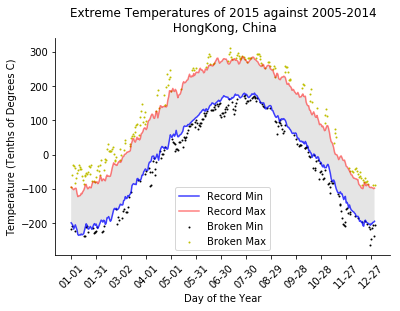

In [48]:
#plot
plt.figure()

plt.plot(temp_min['temp_min_mean'].values,'b',alpha = 0.75,label='Record Min')
plt.plot(temp_max['temp_max_mean'].values,'r',alpha = 0.5,label='Record Max')
#plt.acatter(index,.iloc(index))
plt.scatter(broken_min,temp_min15['temp_min15_mean'].iloc[broken_min],s=1,c='k',label='Broken Min')
plt.scatter(broken_max,temp_max15['temp_max15_mean'].iloc[broken_max],s=1,c='y',label='Broken Max')

plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2015 against 2005-2014\n HongKong, China')
plt.legend()

#范围 内容 important
plt.xticks(range(0,len(temp_min),30),temp_min.index[range(0,len(temp_min),30)],rotation='45')
#shaded area
plt.gca().fill_between(range(len(temp_min)),temp_min['temp_min_mean'],temp_max['temp_max_mean'],
                            facecolor='grey',
                            alpha=0.2)
#删掉一些没用的spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)    

plt.show()